In [1]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("house_prices.csv")
data = ames_housing.drop(columns="SalePrice")
target = ames_housing["SalePrice"]
data = data.select_dtypes(include=[np.number])
target /= 1000

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0, shuffle=True)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_train)

print("Mean squared error: {:.2f}".format(mean_squared_error(target_train, target_predicted)))

Mean squared error: 996.90


In [5]:
target_predicted = regressor.predict(data_test)

print("Mean squared error: {:.2f}".format(mean_squared_error(target_test, target_predicted)))

Mean squared error: 2064.74


In [6]:
regressor.score(data_test, target_test)

0.6872520581075545

In [7]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)
print(
    "R2 score for a regressor predicting the mean:"
    f"{dummy_regressor.score(data_test, target_test):.3f}"
)

R2 score for a regressor predicting the mean:-0.000


In [8]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)#note disadvantage in that it is impacted by larger errro
print("Mean absolute error: {:.2f}".format(mean_absolute_error(target_test, target_predicted)))

Mean absolute error: 22.61


In [9]:
from sklearn.metrics import median_absolute_error

print("Median absolute error: {:.2f}".format(median_absolute_error(target_test, target_predicted)))

Median absolute error: 14.14


In [10]:
from sklearn.metrics import mean_absolute_percentage_error

print("Mean absolute percentage error: {:.2f}".format(mean_absolute_percentage_error(target_test, target_predicted)))

Mean absolute percentage error: 0.14


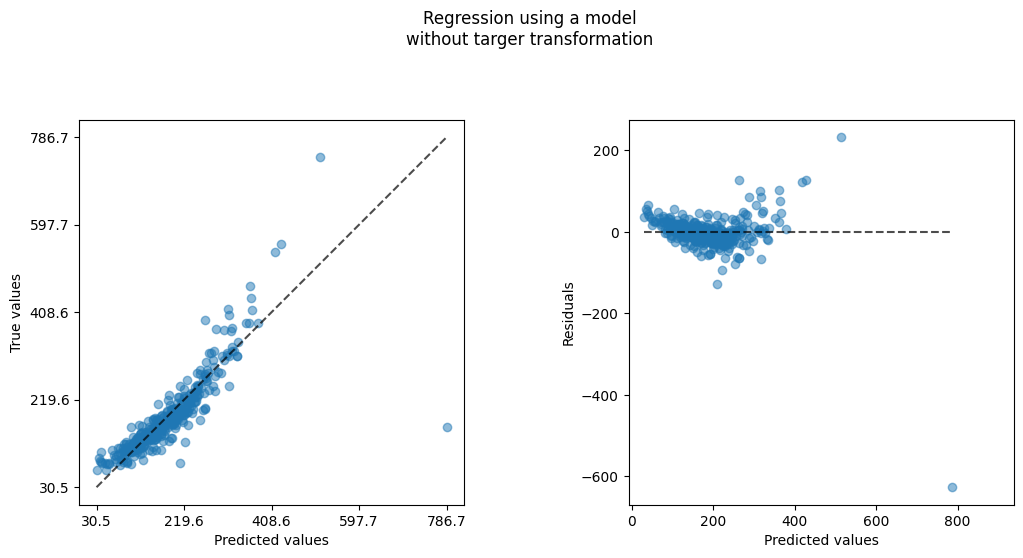

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5)) 

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0]
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values")
axs[0].set_ylabel("True values")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1]
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values")
axs[1].set_ylabel("Residuals")

_ = fig.suptitle(
    "Regression using a model\nwithout targer transformation", y=1.1
)

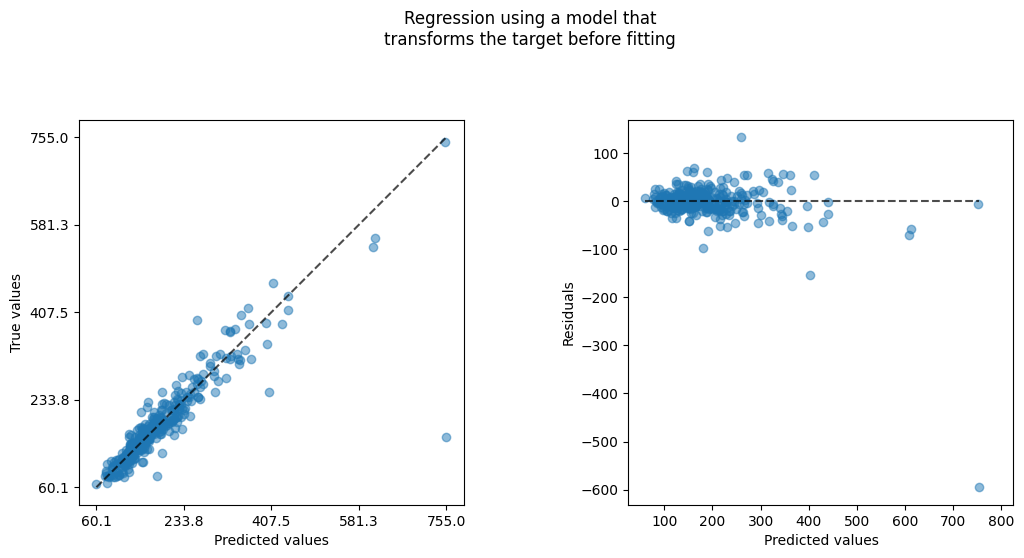

In [12]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = QuantileTransformer(output_distribution="normal", n_quantiles=900)
model_transformed_target = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
model_transformed_target.fit(data_train, target_train)
target_predicted = model_transformed_target.predict(data_test)

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0]
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values")
axs[0].set_ylabel("True values")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1]
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values")
axs[1].set_ylabel("Residuals")

_ = fig.suptitle(
    "Regression using a model that\ntransforms the target before fitting", y=1.1
)

In [13]:
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f}"
)
print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f}"
)
print("Mean absolute percentage error: "
      f"{mean_absolute_percentage_error(target_test, target_predicted):.3f}"
)

Mean absolute error: 17.406
Median absolute error: 10.327
Mean absolute percentage error: 0.099
